# Goal: Display a satellite data (land cover) over the Arctic and Boreal regions and do some basic analyses

In [76]:
# First import the libraries
import numpy as np
import xarray as xr 
import matplotlib.pylab as plt

In [ ]:
# Data are here:
# land cover data: 
https://drive.google.com/file/d/1seVd5MyIATB04FVrWxnrfSE5luIg4kLa/view?usp=sharing

# NDVI 
https://drive.google.com/file/d/13G0g0Fox4aojlPCCPD_4H4a-Yx493jnL/view?usp=sharing

# This notebook:
https://drive.google.com/file/d/1RjbCQngW1YClzA9RXA4wCT2OAxjmHgZf/view?usp=sharing

In [78]:
percent = xr.open_dataset(
    "../data/percent_cover.nc")["__xarray_dataarray_variable__"].sel(
        time=slice(1984, 2013))*100
bands = ["EF","DF","SHRUB","HERB","SPARSE","BARREN","FEN","BOG","SHALLOW","WATER"] # List of bands

In [79]:
percent

<xarray.DataArray '__xarray_dataarray_variable__' (time: 30, band: 10,
                                                   lat: 448, lon: 1348)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * band     (band) int64 1 2 3 4 5 6 7 8 9 10
  * lat      (lat) float64 74.53 74.48 74.43 74.38 ... 52.32 52.27 52.22 52.17
  * lon      (lon) float64 -168.1 -168.0 -168.0 -167.9 ... -100.8 -100.8 -100.7
  * time     (time) int64 1984 1985 1986 1987 1988 ... 2009 2010 2011 2012 2013

### Basic indexing and plotting

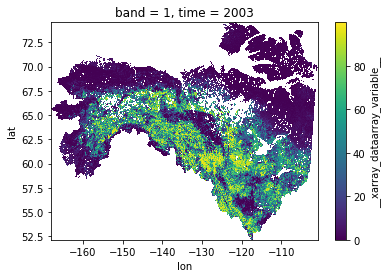

In [18]:
# Plot evergreen forest for the year of 2003
EF_2003= percent.sel(time=2003).isel(band=0)
EF_2003.plot()
# Now plot other land covers and years

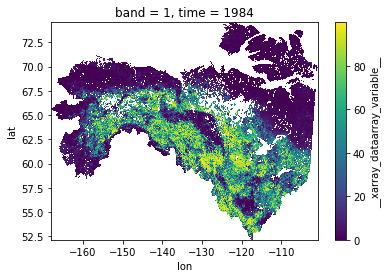

In [34]:
# First, indexing (selecting data) using isel
f1984 = percent.isel(time=0,band=0)    
f1994 = percent.isel(time=10,band=0)
f1984.plot()

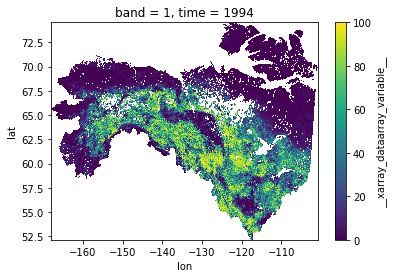

In [80]:
# Another way using sel command
f1984 = percent.sel(time=1984,band=1)    
f1994 = percent.sel(time=1994,band=1)
f1994.plot()


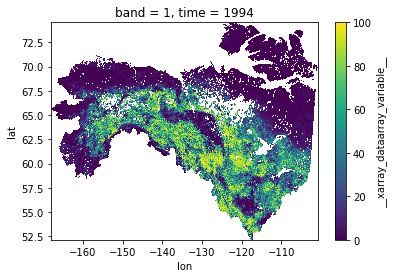

In [81]:
# Another way using sel command
f1984 = percent.sel(time=1984,band=1)    
f2013 = percent.sel(time=2013,band=1)
f1994.plot()


### Basic data exploration

Text(0.5, 1.0, 'Land cover change 1994-2014')

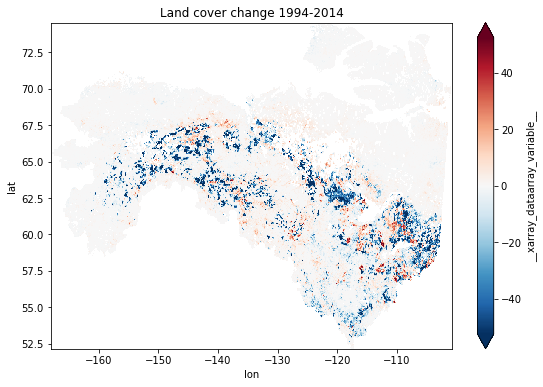

In [84]:
# land cover chane
LCC = f2013 - f1984
# Lets define a bigger plot
plt.figure(figsize=(9, 6))
LCC.plot(robust=True) # Lots of forest loss! and some gain
plt.title("Land cover change 1994-2014")

Text(0.5, 1.0, 'Land cover change 1994-2014')

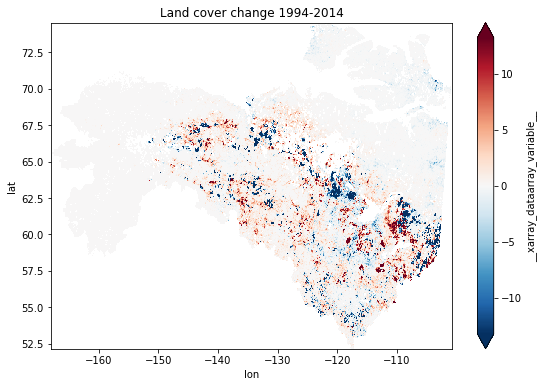

In [85]:
# land cover chane
LCC = f1994 - f1984
# Lets define a bigger plot
plt.figure(figsize=(9, 6))
LCC.plot(robust=True) # Lots of forest loss! and some gain
plt.title("Land cover change 1994-2014")

Text(0.5, 1.0, 'Mean percent cover of EF')

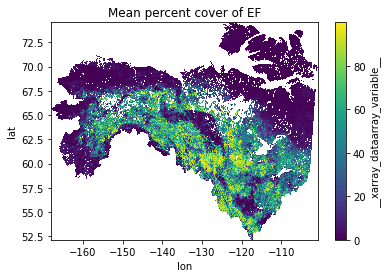

In [55]:
EF = percent.isel(band=0)

# Taking the mean over time
EF_Mean_time = EF.mean(dim="time")
EF_Mean_time.plot()
plt.title("Mean percent cover of EF")

<xarray.DataArray '__xarray_dataarray_variable__' (time: 30)>
array([27.74336 , 27.737396, 27.751938, 27.781239, 27.863567, 27.892834,
       27.87792 , 27.850065, 27.823956, 27.773125, 27.551947, 27.193195,
       27.146923, 27.145502, 26.988304, 26.822351, 26.777283, 26.713873,
       26.634249, 26.56259 , 26.049372, 25.786821, 25.595175, 25.469986,
       25.362007, 25.229435, 25.062857, 24.940563, 24.889685, 24.881485],
      dtype=float32)
Coordinates:
    band     int64 1
  * time     (time) int64 1984 1985 1986 1987 1988 ... 2009 2010 2011 2012 2013


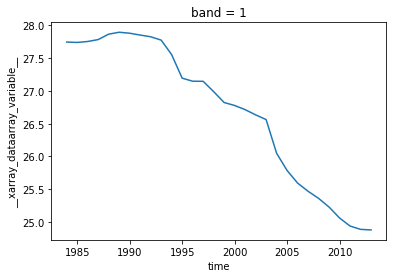

In [86]:
# Taking the mean over the region 
EF_mean_region = EF.mean(["lat","lon"]) # What do you expect to get?
EF_mean_region.plot() # What hapened in 1994? (I'll show later)
print(EF_mean_region)

In [ ]:
### Lets calculate the linear trend of the evergreen forest

[1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013]
[27.74336  27.737396 27.751938 27.781239 27.863567 27.892834 27.87792
 27.850065 27.823956 27.773125 27.551947 27.193195 27.146923 27.145502
 26.988304 26.822351 26.777283 26.713873 26.634249 26.56259  26.049372
 25.786821 25.595175 25.469986 25.362007 25.229435 25.062857 24.940563
 24.889685 24.881485]


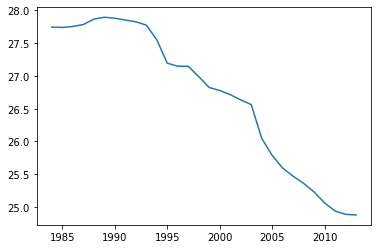

In [87]:
# First define the function to do it
time=percent.time.values
print(time)
values = EF_mean_region.values 
print(values)
plt.plot(time,values)

In [88]:
slope, intercept = np.polyfit(time, values, 1)
print("The slope is:"+str(slope))
print("The intercept is:"+str(intercept))

The slope is:-0.1184754623056612
The intercept is:263.46984482037027


Text(0.5, 1.0, 'The trend of the evergreen forest over the arctic and boreal region. So Sad!')

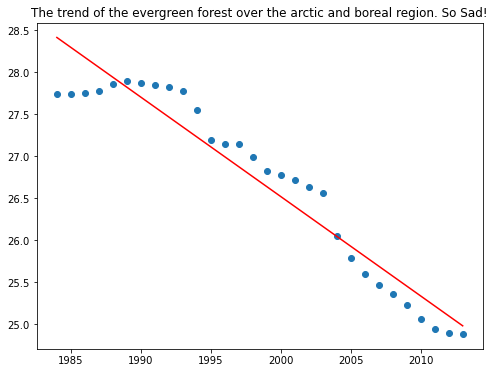

In [89]:
# Plot the trend line on the data
plt.figure(figsize=(8,6))
trend = slope * time + intercept # first calculate the trend line based on slope and intercept
plt.scatter(time,values)
plt.plot(time,trend,'r')
plt.title("The trend of the evergreen forest over the arctic and boreal region. So Sad!")

In [73]:
# Now do it for the greening (NDVI) of the regon by yourself!
# Explore: standard deviation, and other statistics 
# Apply non-linear trend, here is a hint on how:

"""
# Fit a polynomial regression model
degree = 2  # Degree of the polynomial (e.g., quadratic)
coefficients = np.polyfit(time, values, degree)

# Create a polynomial function using the coefficients
poly_func = np.poly1d(coefficients)

# Generate the trend values based on the polynomial function
trend = poly_func(time)
"""" 

# This is how to open the NDVI file:
ndvi = xr.open_dataarray("../data/NDVI_resampled_v2.nc").sel(
    time=slice("1984", "2013")) / 10000